<a href="https://colab.research.google.com/github/caiodavic/Processamento-de-Linguagem-Natural-2022.1/blob/main/Modelagem_de_T%C3%B3picos_em_Poemas_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Modelagem de poemas com LDA
- O Dataframe que iremos utilizar foi retirado do seguinte link do kaggle: https://www.kaggle.com/datasets/oliveirasp6/poems-in-portuguese?resource=download
- O Dataframe tem poemas em português, assim como seus autores e o número de visitas que cada poema obteve no site em que estava postado.


In [ ]:
df = pd.read_csv('portuguese-poems.csv')
print(df.shape)

(15543, 4)


In [ ]:
df.Content[0]

'Eu não tinha este rosto de hoje,\r\nAssim calmo, assim triste, assim magro,\r\nNem estes olhos tão vazios,\r\nNem o lábio amargo.\n\r\nEu não tinha estas mãos sem força,\r\nTão paradas e frias e mortas;\r\nEu não tinha este coração\r\nQue nem se mostra.\n\r\nEu não dei por esta mudança,\r\nTão simples, tão certa, tão fácil:\r\n- Em que espelho ficou perdida\r\nA minha face?'

In [ ]:
df.dropna(inplace=True)
df.shape

(15541, 4)

In [ ]:
stop_words = set(stopwords.words("portuguese"))
stop_words.update(['que', 'até', 'esse', 
                    'essa', 'pro', 'pra',
                    'oi']) 


- É de grande importância preparar os dados, removendo stopwords, pontuação, dígitos, entre outros que podem atrapalhar a modelagem de tópico.

In [ ]:
def clean_text(poem):  
  poem = poem.lower()
  poem = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", poem)
  poem = re.sub('[,.!?;:/]', '', poem)
  poem = re.sub('\r\n', ' ',poem)
  poem = re.sub('\n', ' ',poem)
  poem = ' '.join(i for i in poem.split() if not(i in stop_words) and len(i) > 2 and (not any (c.isdigit() for c in i)))

  return poem

<>:3: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \d
<ipython-input-73-d2339a115edb>:3: DeprecationWarning: invalid escape sequence \d
  poem = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", poem)


In [ ]:
df['clean_poem'] = df.Content.apply(clean_text)

In [ ]:
df.clean_poem[0]

'rosto hoje assim calmo assim triste assim magro olhos tão vazios lábio amargo mãos força tão paradas frias mortas coração mostra dei mudança tão simples tão certa tão fácil espelho ficou perdida face'

In [ ]:
df.head(5)

,Author,Title,Content,Views,clean_poem
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calmo, assim triste, assim magro,\r\nNem estes olhos tão vazios,\r\nNem o lábio amargo.\n\r\nEu não tinha estas mãos sem força,\r\nTão paradas e frias e mortas;\r\nEu não tinha este coração\r\nQue nem se mostra.\n\r\nEu não dei por esta mudança,\r\nTão s...",1018431,rosto hoje assim calmo assim triste assim magro olhos tão vazios lábio amargo mãos força tão paradas frias mortas coração mostra dei mudança tão simples tão certa tão fácil espelho ficou perdida face
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exagera ou exclui.\r\nSê todo em cada coisa. Põe quanto és\r\nNo mínimo que fazes.\r\nAssim em cada lago a lua toda\r\nBrilha, porque alta vive.",1979413,grande inteiro nada exagera exclui todo cada coisa põe quanto mínimo fazes assim cada lago lua toda brilha porque alta vive
2,Marina Colasanti,"Eu sei, mas não devia","Eu sei que a gente se acostuma. Mas não devia.\r\nA gente se acostuma a morar em apartamento de fundos \r\ne a não ter outra vista que não seja as janelas ao redor. \n\r\nE porque não tem vista, logo se acostuma a não olhar para fora.\r\nE porque não olha para fora logo se acostuma a não abrir d...",301509,sei gente acostuma devia gente acostuma morar apartamento fundos ter outra vista janelas redor porque vista logo acostuma olhar porque olha logo acostuma abrir todo cortinas porque abre cortinas logo acostuma acender cedo luz medida acostuma esquece sol esquece esquece amplidão gente acostuma ac...
3,Carlos Drummond de Andrade,Quadrilha,"João amava Teresa que amava Raimundo\r\nque amava Maria que amava Joaquim que amava Lili\r\nque não amava ninguém.\r\nJoão foi para os Estados Unidos, Teresa para o convento,\r\nRaimundo morreu de desastre, Maria ficou pra tia,\r\nJoaquim suicidou-se e Lili casou com J. Pinto Fernandes\r\nque nã...",1421206,joão amava teresa amava raimundo amava maria amava joaquim amava lili amava ninguém joão estados unidos teresa convento raimundo morreu desastre maria ficou tia joaquim suicidou-se lili casou pinto fernandes entrado história
4,Eugénio de Andrade,É urgente o amor,"É urgente o amor.\r\nÉ urgente um barco no mar.\n\r\nÉ urgente destruir certas palavras,\r\nódio, solidão e crueldade,\r\nalguns lamentos,\r\nmuitas espadas.\n\r\nÉ urgente inventar alegria,\r\nmultiplicar os beijos, as searas,\r\né urgente descobrir rosas e rios\r\ne manhãs claras.\n\r\nCai o s...",621197,urgente amor urgente barco mar urgente destruir certas palavras ódio solidão crueldade alguns lamentos muitas espadas urgente inventar alegria multiplicar beijos searas urgente descobrir rosas rios manhãs claras cai silêncio ombros luz impura doer urgente amor urgente permanecer


- WordCloud é uma ferramenta legal para visualizarmos as palavras mais frequentes no nosso documento.

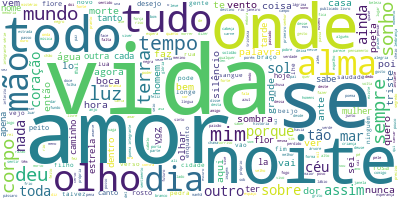

In [ ]:
long_string = ','.join(list(df['clean_poem'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

- Utilizaremos TFs, e não TF-IDFs. Como LDA se baseia em frequência de palavras, TFs se aplica melhor para esse caso.

- LDA trabalha com frequência de termos nos documentos, então precisamos da própria contagem dos termos. 

In [ ]:
tf_vectorizer = CountVectorizer(
        min_df = 30,
        max_df = 0.5,
        max_features = 10000,
        stop_words = stop_words, 
        ngram_range = (1,2)
  )

vec_text = tf_vectorizer.fit_transform(df.clean_poem)
words = tf_vectorizer.get_feature_names()
print(vec_text.shape)
print(len(words))


(15541, 5292)
5292


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
words[0:10]

['abaixo',
 'abandona',
 'abandonada',
 'abandonado',
 'abandonar',
 'abandono',
 'abelha',
 'abelhas',
 'aberta',
 'abertas']

## Encontrando tópicos
##### O resultado terá

- uma matriz que descreve a relação entre palavras e tópicos
- uma matriz que descreve a relação entre documentos e tópicos

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print(f"\n--\nTopic #{topic_idx + 1}: ")

    message = ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()


In [ ]:
def display_topics(W, H, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print(f"\n--\nTopic #{topic_idx + 1}: ")
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx: 
          doc_data = df[['Author', 'Title']].iloc[d]
          print(f'{doc_data[1]} - {doc_data[0]} : \t{W[d, topic_idx]:.2f}')

In [ ]:
lda = LatentDirichletAllocation(n_components=10,  # número de tópicos que vamos tentar descobrir
                                max_iter = 5,
                                learning_method='online', # caso online, demorará menos e irá usar um conjunto de dados menor
                                random_state=0)

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text)

- Ao chamar o transform com a representação textual em formato de vetor como parâmetro, o LDA nos retorna a matriz que apresenta a relação entre documentos (nossos poemas) e tópicos 

In [ ]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(15541, 10)
Matriz tópicos-termos:(10, 5292)


- Analisando as palavras com maior probabilidade em cada tópico

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names,15)


--
Topic #1: 
the, and, los, that, del, las, una, with, not, all, con, edição, borges, completa, poesia

--
Topic #2: 
mim, tudo, vida, tão, amor, ter, nada, sempre, assim, dia, nunca, tempo, alma, coração, ver

--
Topic #3: 
quero, sei, amor, tudo, deus, nada, porque, vida, hoje, mim, belo, parte, bem, mundo, existe

--
Topic #4: 
mar, noite, sol, dia, corpo, rio, mãos, vento, onde, água, cidade, águas, sobre, sob, vem

--
Topic #5: 
amor, alma, luz, flor, noite, olhos, céu, onde, sol, flores, voz, sonho, olhar, peito, lua

--
Topic #6: 
todos, poeta, gente, homem, poesia, outros, sempre, ainda, porque, palavras, todas, anos, mundo, tempo, vez

--
Topic #7: 
terra, deus, tão, olhos, onde, morte, vem, senhor, sangue, rei, vós, pois, filho, mil, mãe

--
Topic #8: 
poema, livro, paulo, rio, publicado, janeiro, publicado livro, rio janeiro, série, integrante, integrante série, poema integrante, poesia, poesias, poemas

--
Topic #9: 
casa, mulher, mão, boca, língua, corpo, seios, disse, m

- Analisando os tópicos e os 5 poemas mais associados com cada tópico

In [ ]:
display_topics(doc_topic_matrix,
               lda.components_, 
               words,
               df,
               10, 
               5)


--
Topic #1: 
THE, AND, LOS, THAT, DEL, LAS, UNA, WITH, NOT, ALL
40 - ELEVATION - Fernando Pessoa : 	1.00
Now are no Janus’ temple-doors thrown wide - Fernando Pessoa : 	1.00
52 - SUMMERLAND - Fernando Pessoa : 	1.00
16 - LULLABY - Fernando Pessoa : 	1.00
47 - FIAT LUX - Fernando Pessoa : 	1.00

--
Topic #2: 
MIM, TUDO, VIDA, TÃO, AMOR, TER, NADA, SEMPRE, ASSIM, DIA
Soneto do amor total - Vinicius de Moraes : 	0.98
Limites do Amor - Affonso Romano de Sant'Anna : 	0.97
Tu tens um medo - Cecília Meireles : 	0.97
Na véspera de nada - Fernando Pessoa : 	0.97
Herança - Cecília Meireles : 	0.97

--
Topic #3: 
QUERO, SEI, AMOR, TUDO, DEUS, NADA, PORQUE, VIDA, HOJE, MIM
A Perfeição - Clarice Lispector : 	0.97
Precisão - Clarice Lispector : 	0.97
Requiem por um bicho - Ruy Belo : 	0.96
Elogio da amada - Ruy Belo : 	0.96
Cerimonial - Ruy Belo : 	0.96

--
Topic #4: 
MAR, NOITE, SOL, DIA, CORPO, RIO, MÃOS, VENTO, ONDE, ÁGUA
Pus o meu sonho num navio - Cecília Meireles : 	0.98
Canção - Cecília Mei

- Associando cada linha a cada tópico a partir das maiores associações (probabilidades)

In [ ]:
main_topic = []
mt_prob = []
for l in range(len(df['Author'])):
  main_topic.append(doc_topic_matrix[l,:].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l,:].max())

df = df.assign(main_topic = main_topic, main_topic_prob = mt_prob)

In [ ]:
df.head()

,Author,Title,Content,Views,clean_poem,main_topic,main_topic_prob
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calmo, assim triste, assim magro,\r\nNem estes olhos tão vazios,\r\nNem o lábio amargo.\n\r\nEu não tinha estas mãos sem força,\r\nTão paradas e frias e mortas;\r\nEu não tinha este coração\r\nQue nem se mostra.\n\r\nEu não dei por esta mudança,\r\nTão s...",1018431,rosto hoje assim calmo assim triste assim magro olhos tão vazios lábio amargo mãos força tão paradas frias mortas coração mostra dei mudança tão simples tão certa tão fácil espelho ficou perdida face,7,0.486271
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exagera ou exclui.\r\nSê todo em cada coisa. Põe quanto és\r\nNo mínimo que fazes.\r\nAssim em cada lago a lua toda\r\nBrilha, porque alta vive.",1979413,grande inteiro nada exagera exclui todo cada coisa põe quanto mínimo fazes assim cada lago lua toda brilha porque alta vive,2,0.825435
2,Marina Colasanti,"Eu sei, mas não devia","Eu sei que a gente se acostuma. Mas não devia.\r\nA gente se acostuma a morar em apartamento de fundos \r\ne a não ter outra vista que não seja as janelas ao redor. \n\r\nE porque não tem vista, logo se acostuma a não olhar para fora.\r\nE porque não olha para fora logo se acostuma a não abrir d...",301509,sei gente acostuma devia gente acostuma morar apartamento fundos ter outra vista janelas redor porque vista logo acostuma olhar porque olha logo acostuma abrir todo cortinas porque abre cortinas logo acostuma acender cedo luz medida acostuma esquece sol esquece esquece amplidão gente acostuma ac...,6,0.495456
3,Carlos Drummond de Andrade,Quadrilha,"João amava Teresa que amava Raimundo\r\nque amava Maria que amava Joaquim que amava Lili\r\nque não amava ninguém.\r\nJoão foi para os Estados Unidos, Teresa para o convento,\r\nRaimundo morreu de desastre, Maria ficou pra tia,\r\nJoaquim suicidou-se e Lili casou com J. Pinto Fernandes\r\nque nã...",1421206,joão amava teresa amava raimundo amava maria amava joaquim amava lili amava ninguém joão estados unidos teresa convento raimundo morreu desastre maria ficou tia joaquim suicidou-se lili casou pinto fernandes entrado história,2,0.305711
4,Eugénio de Andrade,É urgente o amor,"É urgente o amor.\r\nÉ urgente um barco no mar.\n\r\nÉ urgente destruir certas palavras,\r\nódio, solidão e crueldade,\r\nalguns lamentos,\r\nmuitas espadas.\n\r\nÉ urgente inventar alegria,\r\nmultiplicar os beijos, as searas,\r\né urgente descobrir rosas e rios\r\ne manhãs claras.\n\r\nCai o s...",621197,urgente amor urgente barco mar urgente destruir certas palavras ódio solidão crueldade alguns lamentos muitas espadas urgente inventar alegria multiplicar beijos searas urgente descobrir rosas rios manhãs claras cai silêncio ombros luz impura doer urgente amor urgente permanecer,3,0.679723


- Podemos analisar alguns dos poemas de cada tópico com o código abaixo.


In [ ]:
topico = 7
pd.options.display.max_colwidth = 300
df[df['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','Author', 'Content']].head(20).sample(10)

,main_topic_prob,Author,Content
14579,0.747186,Florbela Espanca,"Há no fado das vielas\r\nNotas tão sentimentais,\r\nTão delicadas, tão belas,\r\nQue não s’esquecem jamais!\n\n"
76,0.761863,Bertolt Brecht,"Quem construiu Tebas, a das sete portas?\r\nNos livros vem o nome dos reis,\r\nMas foram os reis que transportaram as pedras?\r\nBabilónia, tantas vezes destruida,\r\nQuem outras tantas a reconstruiu? Em que casas\r\nDa Lima Dourada moravam seus obreiros?\r\nNo dia em que ficou pronta a Muralha ..."
15129,0.909989,Fernando Pessoa,Roçou-me\r\nO [...] pelo rosto o manto seu\r\nE o seu manto é de Mal e Escuridão.\r\nCoroou-me rei e a coroa que me deu\r\nÉ um sinal de servidão.\n
6430,0.709250,António Arnaut,"Da tribuna envergonhada\r\npor tanta demagogia\r\no orador prometia,\r\nduma assentada,\r\na terra e o céu.\n\r\nO povoléu,\r\nincr´´dulo, sorvia\r\na fome de tanta fartura.\n\r\nPorém, a certa altura\r\no orador entupiu\r\ne caíu-lhe a dentadura.\n\r\nQuando a assistência saíu,\r\npisou-lhe a f..."
11417,0.819945,Marcos A. P. Ribeiro,Robert Lowell morto num táxi em Manhattan.\n\r\nO sol parece infantil.\n\n
4483,0.781968,Reinaldo Ferreira,"Oh! vós, que dominais vossos instintos\r\nComo se fossem cavalos!\r\nOh! vós, que os amestrais, para exibi-los\r\nComo se fossem ursos!\r\nOh! vós, que, infatigáveis domadores de impulsos,\r\nExibindo-os, colheis aplausos, contratos e elogios!\r\nGlória a vós! Glória a vós, represadores\r\nDo ca..."
2881,0.887481,Stéphane Mallarmé,O olho vivo com que vês\r\n Até o seu conteúdo\r\n Me aparta de minhas vestes\r\n E como um deus vou desnudo\n\n\n
7616,0.751554,Mário Donizete Massari,A TARDE É BELA\r\nA VIDA É BELA\r\nARABELA É BELA\n\r\nUm velho leva a vela\r\nArabela é ainda mais bela\r\ncom o rosto iluminado\r\npela vela\n\r\nUm velho leva a vela\r\nno enterro de Arabela\n\n
11755,0.871395,Roberto Saito,"Depois da geada\r\nnas faces do espantalho\r\nlágrimas geladas.\n\r\nCálidos casacos\r\ntodos rodeando um morto —\r\npálido, gelado.\n\n"
212,0.724221,Gonçalves Dias,"I\n\r\nAqui na floresta\r\nDos ventos batida,\r\nFaçanhas de bravos\r\nNão geram escravos,\r\nQue estimem a vida\r\nSem guerra e lidar.\r\n— Ouvi-me, Guerreiros,\r\n— Ouvi meu cantar.\n\r\nII\n\r\nValente na guerra,\r\nQuem há, como eu sou?\r\nQuem vibra o tacape\r\nCom mais valentia?\r\nQuem go..."


- Abaixo podemos acessar poemas de algum Autor específico e todas as suas associações com cada tópico

In [ ]:
# column names
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

poema_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index = df.index)
poema_topico[['Author', 'Title']] = df[['Author','Title']]

ordem = ['Author', 'Title']
ordem.extend(topicnames)
poema_topico = poema_topico[ordem]

poema_topico.query('Author == "Carlos Drummond de Andrade"').sort_values(by = 'Topic 7', ascending = False).head(10)

,Author,Title,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
956,Carlos Drummond de Andrade,Indagação,0.00,0.21,0.00,0.00,0.00,0.12,0.30,0.00,0.36,0.00
1069,Carlos Drummond de Andrade,O que se passa na cama,0.00,0.37,0.21,0.00,0.00,0.00,0.29,0.00,0.11,0.00
410,Carlos Drummond de Andrade,Para Sempre,0.00,0.29,0.00,0.23,0.00,0.00,0.28,0.00,0.00,0.20
301,Carlos Drummond de Andrade,Segredo,0.00,0.19,0.25,0.17,0.00,0.13,0.25,0.00,0.00,0.00
552,Carlos Drummond de Andrade,À Noite Dissolve os Homens,0.00,0.15,0.06,0.17,0.21,0.10,0.24,0.00,0.00,0.08
737,Carlos Drummond de Andrade,"Acordar, Viver",0.00,0.31,0.24,0.00,0.00,0.00,0.20,0.03,0.00,0.20
758,Carlos Drummond de Andrade,Não Passou,0.00,0.61,0.00,0.00,0.00,0.00,0.20,0.00,0.08,0.10
1155,Carlos Drummond de Andrade,Confidência do Itabirano,0.00,0.09,0.00,0.19,0.05,0.38,0.19,0.00,0.06,0.04
581,Carlos Drummond de Andrade,POEMA DO JORNAL,0.01,0.19,0.01,0.01,0.01,0.35,0.17,0.01,0.26,0.01
843,Carlos Drummond de Andrade,O Arco,0.00,0.52,0.00,0.00,0.13,0.00,0.16,0.00,0.00,0.17


# Visualizando cada tópico

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pyLDAvis.sklearn.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1   7.901508
1       0.648955  71.707100       2        1  18.313297
2      71.019684   9.971006       3        1   6.400946
3       3.785981  33.185135       4        1   9.130662
4     -42.666500  -9.222070       5        1  12.878298
5      -3.621689 -43.526516       6        1  10.388102
6      -3.632402  -4.171708       7        1   9.994701
7     -36.584400  35.804413       8        1   5.196940
8      44.391380  50.615383       9        1   6.231818
9      40.235809 -31.591665      10        1  13.563726, topic_info=        Term         Freq        Total Category  logprob  loglift
4723     the  4218.000000  4218.000000  Default  30.0000  30.0000
253      and  2772.000000  2772.000000  Default  29.0000  29.0000
4310     sei  2168.000000  2168.000000  Default  28.0000  28.0000
2817     mar  2973.000000  2973.000000  Default  27.0000  27.0000
3670   poema  1819.000000  1819.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3297   olhos   605.287980  3547.316481  Topic10  -5.2102   0.2295
5027   vento   481.369588  1761.056794  Topic10  -5.4393   0.7007
4901    tudo   501.070315  4191.125535  Topic10  -5.3992  -0.1262
1178     céu   457.912649  1995.778415  Topic10  -5.4893   0.5257
4332  sempre   439.629252  2915.973593  Topic10  -5.5300   0.1057

[683 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         9  0.992457    abaixo
5         8  0.052027  abandono
5        10  0.943924  abandono
13        7  0.993783   abismos
20        6  0.008500     abrem
...     ...       ...       ...
5259     10  0.922611   árvores
5267      6  0.985934     época
5269      4  0.994902    êxtase
5277      3  0.761959      ódio
5277      6  0.234790      ódio

[1752 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

- Podemos examinar a nossa relação entre os documentose os tópicos. Reduz nossa matriz para duas dimensão (x,y), tentando representar graficamente semelhanças e diferenças.